# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Requests
import requests
import json

import time
from pprint import pprint

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys_Berry import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:60]):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | truth or consequences
Processing Record 2 of Set 1 | palikir - national government center
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | kittila
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | acarau
Processing Record 9 of Set 1 | at taj
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | flying fish cove
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | tuban
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | igarka
Processing Record 20 of Set 1 | kribi
Processing Record 21 of Set 1 | sao joao do piaui
Processi

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          60
Lat           60
Lng           60
Max Temp      60
Humidity      60
Cloudiness    60
Wind Speed    60
Pressure      60
Country       60
Date          60
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Truth or Consequences,33.1284,-107.2528,64.15,14,0,3.44,1021,US,1733179609
1,Palikir,6.9248,158.1611,79.65,89,100,14.97,1008,FM,1733179611
2,Kingston,17.9970,-76.7936,83.35,74,20,4.61,1015,JM,1733179532
3,Papatowai,-46.5619,169.4708,71.71,54,98,8.95,1007,NZ,1733179613
4,Waitangi,-43.9535,-176.5597,56.68,86,96,9.98,1019,NZ,1733179614


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_Berry.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_Berry.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Truth or Consequences,33.1284,-107.2528,64.15,14,0,3.44,1021,US,1733179609
1,Palikir,6.9248,158.1611,79.65,89,100,14.97,1008,FM,1733179611
2,Kingston,17.9970,-76.7936,83.35,74,20,4.61,1015,JM,1733179532
3,Papatowai,-46.5619,169.4708,71.71,54,98,8.95,1007,NZ,1733179613
4,Waitangi,-43.9535,-176.5597,56.68,86,96,9.98,1019,NZ,1733179614


In [60]:
# Date Cleaning w/dates
city_data_df["Date"] = pd.to_datetime(city_data_df.Date * 1e9)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Truth or Consequences,33.1284,-107.2528,64.15,14,0,3.44,1021,US,2024-12-02 22:46:49
1,Palikir,6.9248,158.1611,79.65,89,100,14.97,1008,FM,2024-12-02 22:46:51
2,Kingston,17.9970,-76.7936,83.35,74,20,4.61,1015,JM,2024-12-02 22:45:32
3,Papatowai,-46.5619,169.4708,71.71,54,98,8.95,1007,NZ,2024-12-02 22:46:53
4,Waitangi,-43.9535,-176.5597,56.68,86,96,9.98,1019,NZ,2024-12-02 22:46:54


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

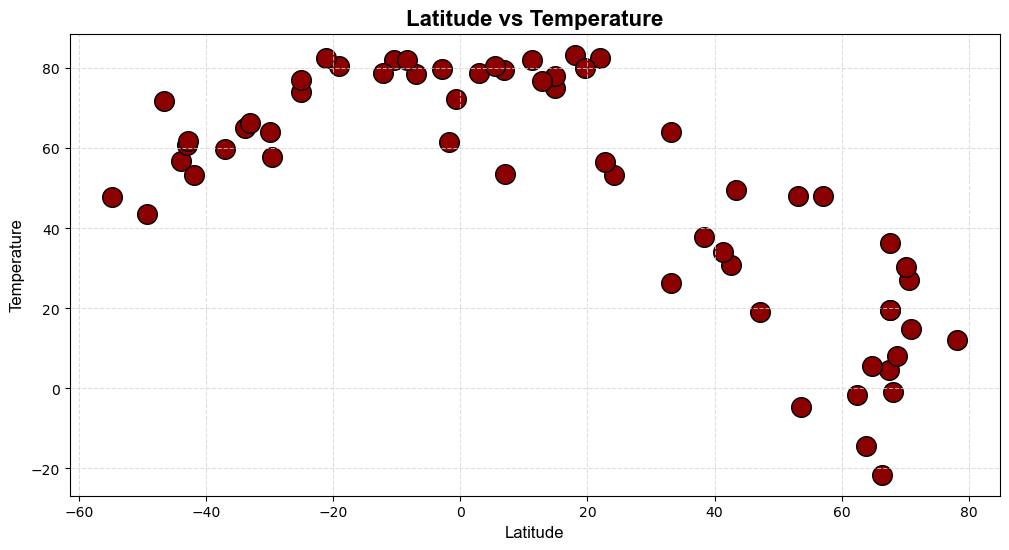

In [61]:
# Build scatter plot for latitude vs. temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="darkred", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

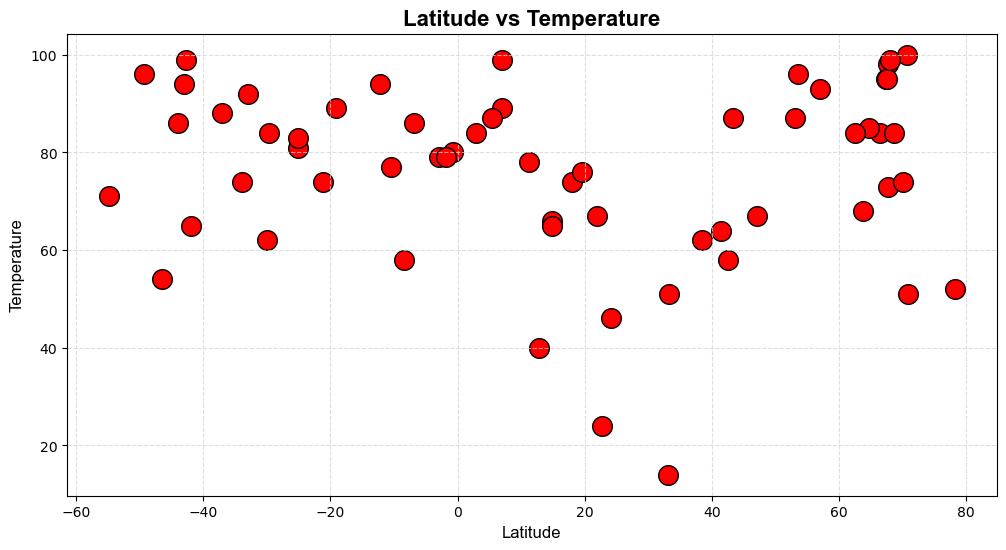

In [62]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="red", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

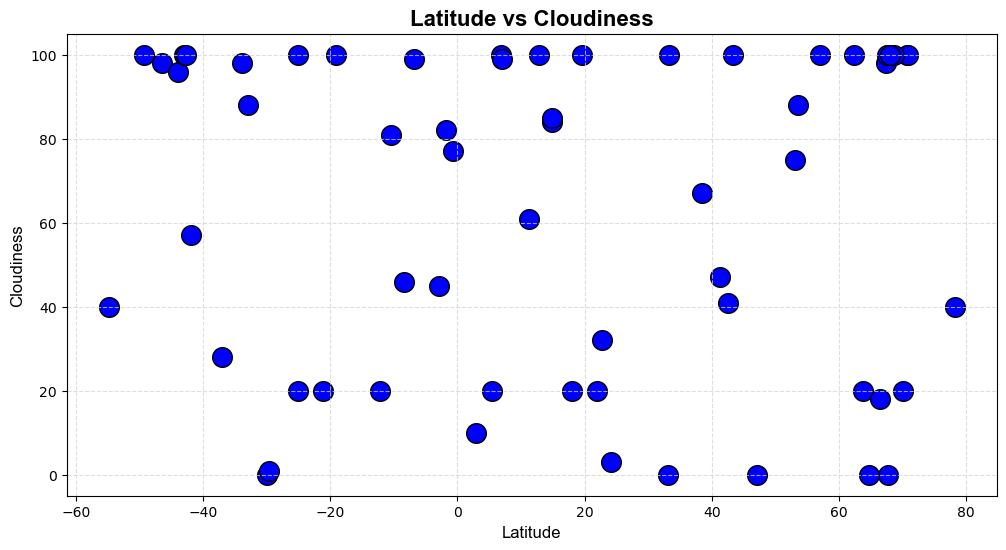

In [63]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="blue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE


#### Latitude vs. Wind Speed Plot

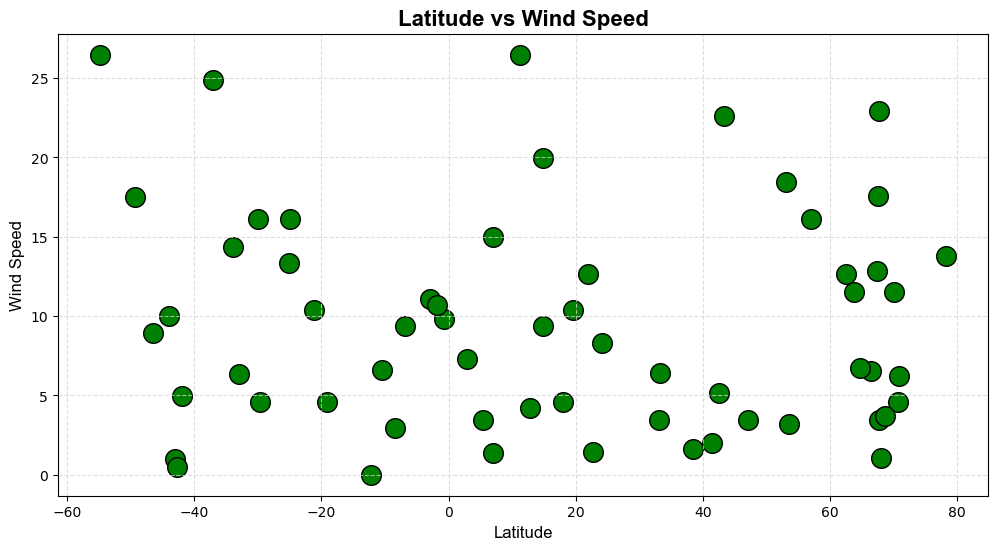

In [64]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="green", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkred", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Truth or Consequences,33.1284,-107.2528,64.15,14,0,3.44,1021,US,2024-12-02 22:46:49
1,Palikir,6.9248,158.1611,79.65,89,100,14.97,1008,FM,2024-12-02 22:46:51
2,Kingston,17.9970,-76.7936,83.35,74,20,4.61,1015,JM,2024-12-02 22:45:32
3,Kittilä,67.6647,24.8936,19.54,73,0,3.44,1000,FI,2024-12-02 22:46:55
4,At Tāj,24.2049,23.2857,53.37,46,3,8.32,1021,LY,2024-12-02 22:46:59


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Papatowai,-46.5619,169.4708,71.71,54,98,8.95,1007,NZ,2024-12-02 22:46:53
1,Waitangi,-43.9535,-176.5597,56.68,86,96,9.98,1019,NZ,2024-12-02 22:46:54
2,Blackmans Bay,-43.0167,147.3167,60.73,94,100,1.01,1000,AU,2024-12-02 22:46:56
3,Acaraú,-2.8856,-40.1200,79.66,79,45,11.10,1012,BR,2024-12-02 22:46:57
4,Flying Fish Cove,-10.4217,105.6791,82.13,77,81,6.58,1008,CX,2024-12-02 22:47:02


###  Temperature vs. Latitude Linear Regression Plot

-0.8563407505594877
y = -1.12x + 87.01


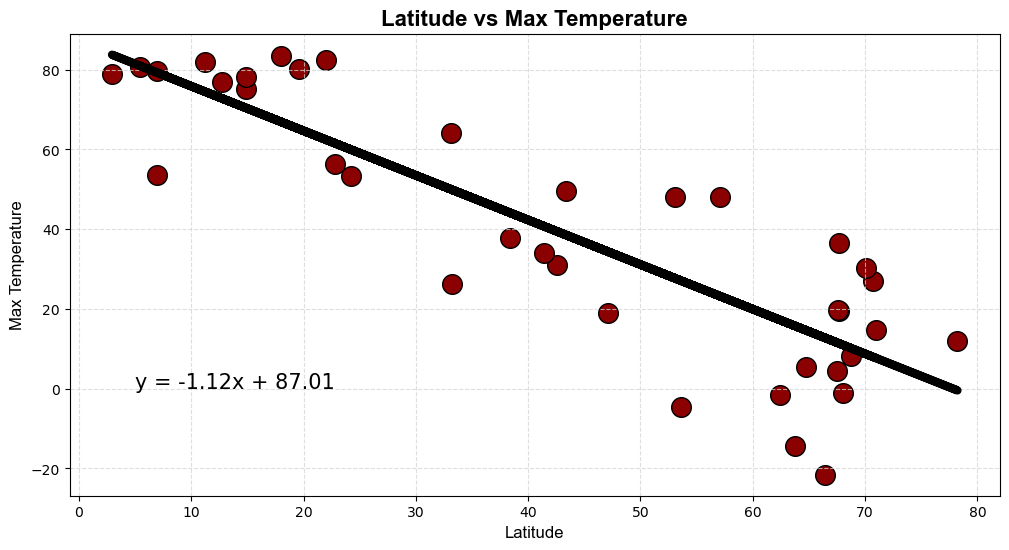

In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.7328984788026395
y = 0.51x + 81.45


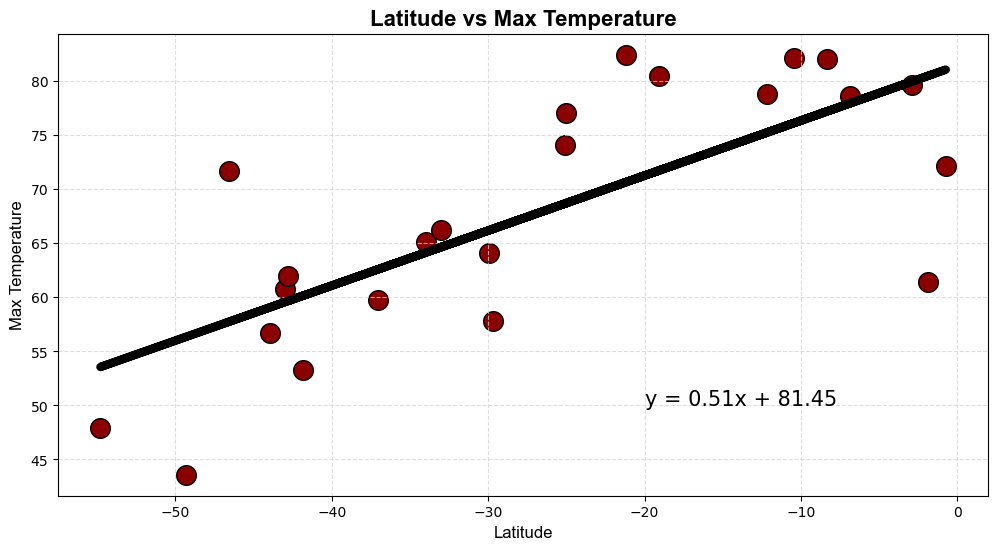

In [73]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.24583904064245857
y = 0.21x + 64.33


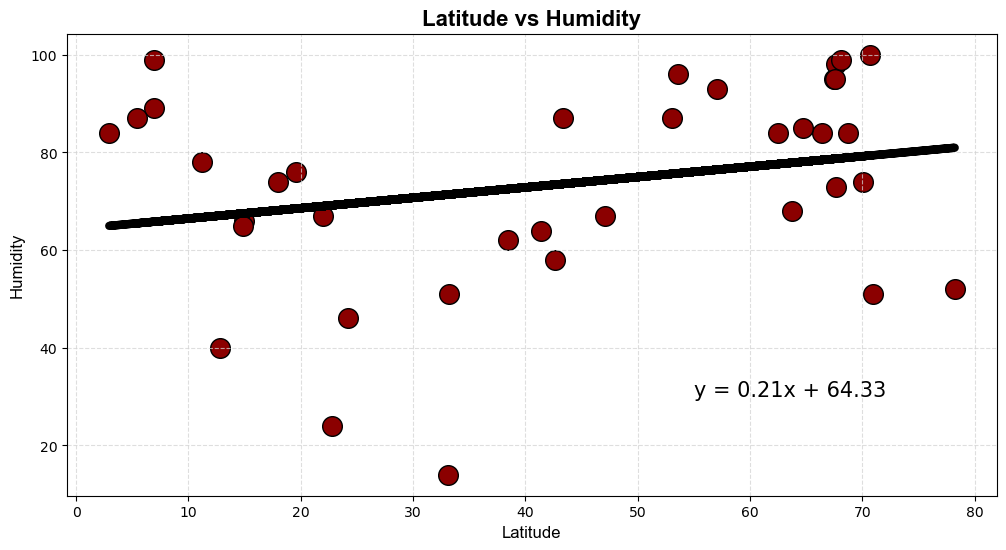

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.04615315653517572
y = -0.03x + 79.31


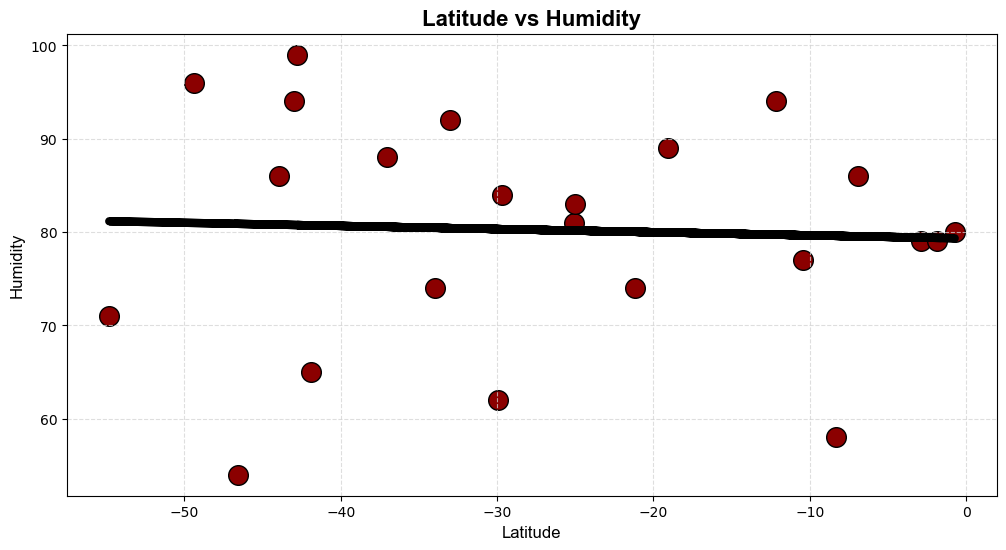

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.24583904064245857
y = 0.21x + 64.33


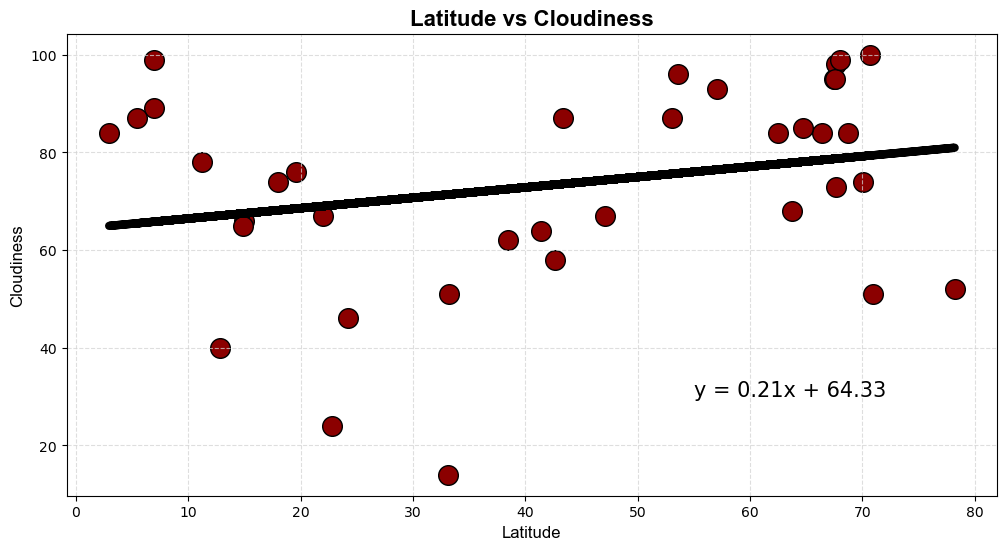

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.04615315653517572
y = -0.03x + 79.31


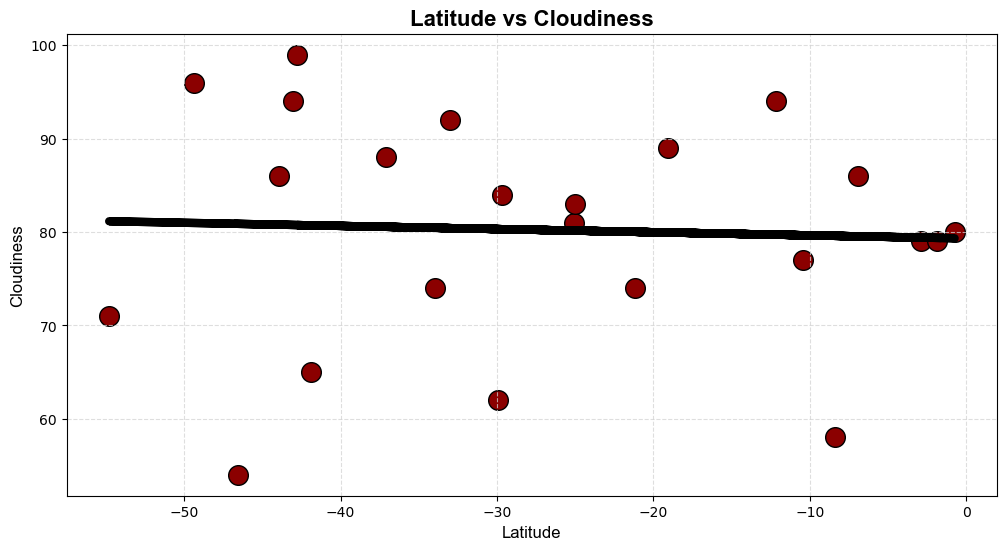

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.24583904064245857
y = 0.21x + 64.33


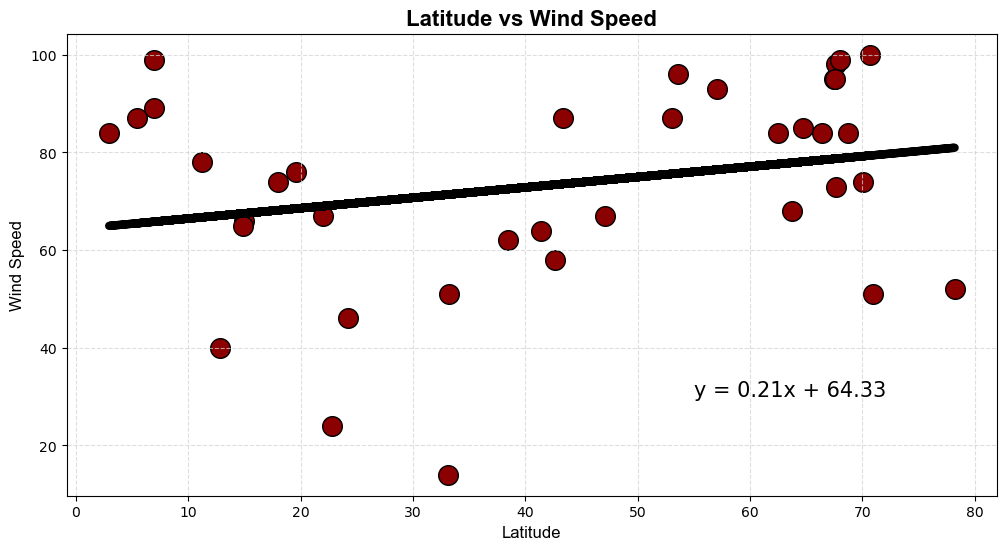

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = soutthern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Wind"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE